In [1]:
import pandas as pd
import seaborn as sb

In [2]:
df = sb.load_dataset('diamonds')

In [3]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [8]:
df.describe(include='all',percentiles=[0.10,0.50,0.90])

carat    cut  color clarity         depth         table  \
count   53940.000000  53940  53940   53940  53940.000000  53940.000000   
unique           NaN      5      7       8           NaN           NaN   
top              NaN  Ideal      G     SI1           NaN           NaN   
freq             NaN  21551  11292   13065           NaN           NaN   
mean        0.797940    NaN    NaN     NaN     61.749405     57.457184   
std         0.474011    NaN    NaN     NaN      1.432621      2.234491   
min         0.200000    NaN    NaN     NaN     43.000000     43.000000   
10%         0.310000    NaN    NaN     NaN     60.000000     55.000000   
50%         0.700000    NaN    NaN     NaN     61.800000     57.000000   
90%         1.510000    NaN    NaN     NaN     63.300000     60.000000   
max         5.010000    NaN    NaN     NaN     79.000000     95.000000   

               price             x             y             z  
count   53940.000000  53940.000000  53940.000000  53940.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     3932.799722      5.731157      5.734526      3.538734  
std      3989.439738      1.121761      1.142135      0.705699  
min       326.000000      0.000000      0.000000      0.000000  
10%       646.000000      4.360000      4.360000      2.690000  
50%      2401.000000      5.700000      5.710000      3.530000  
90%      9821.000000      7.310000      7.300000      4.520000  
max     18823.000000     10.740000     58.900000     31.800000

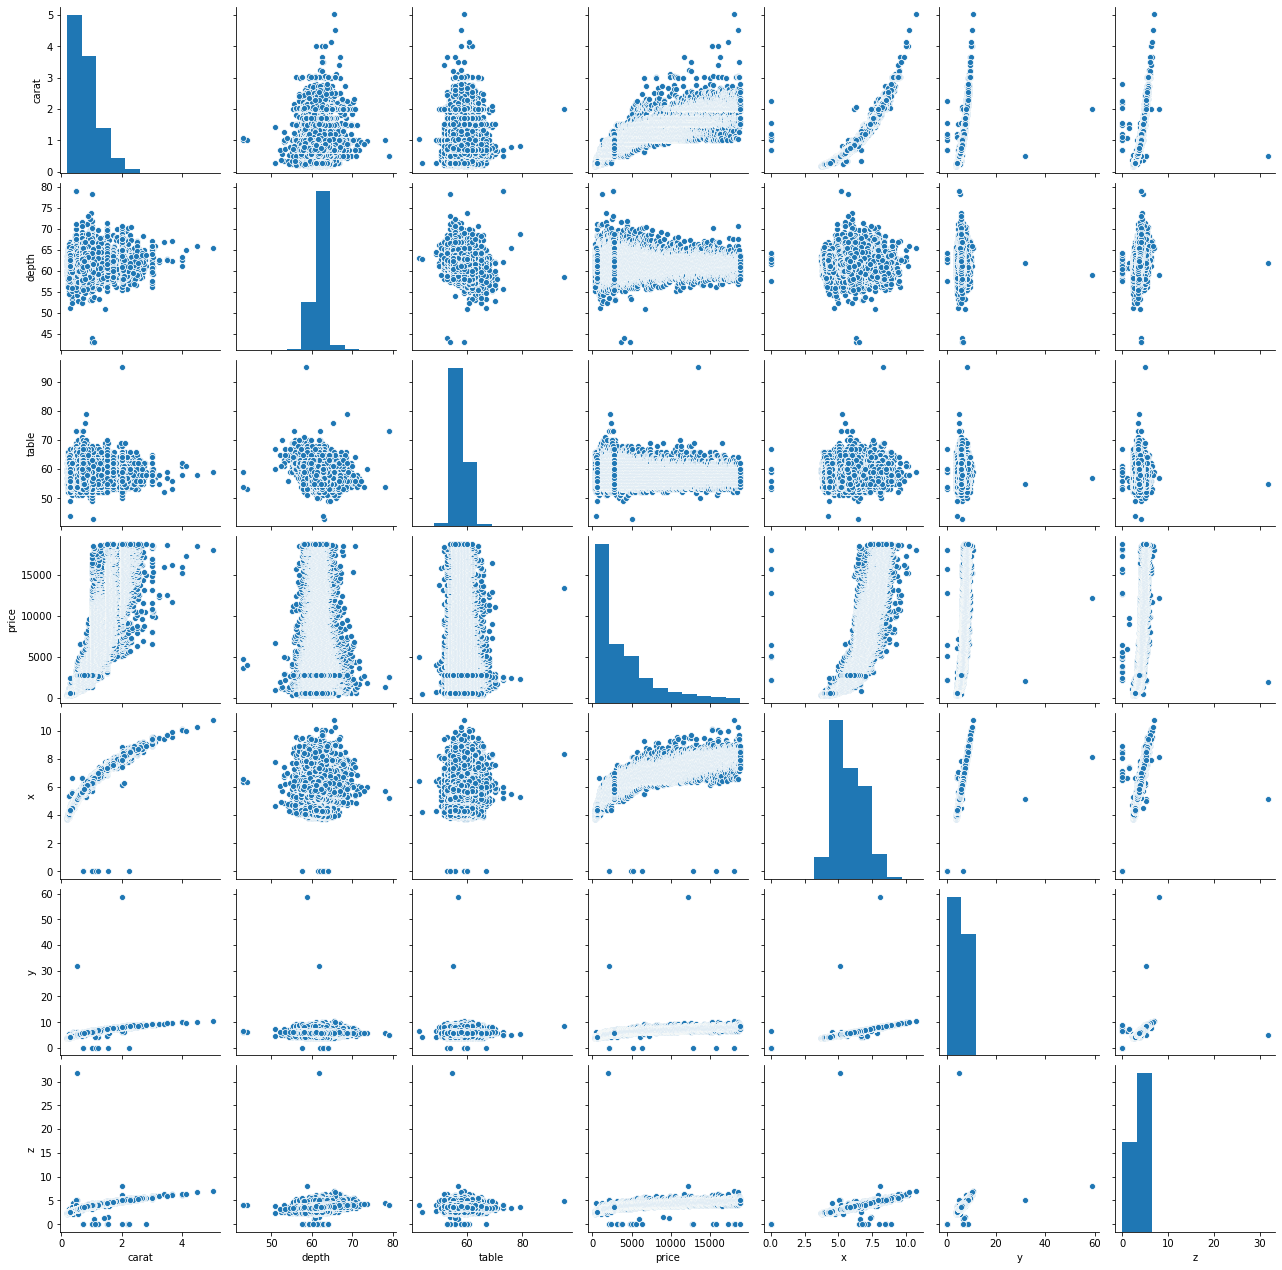

In [9]:
sb.pairplot(df)

In [10]:
df.query("z>x")

carat        cut color clarity  depth  table  price     x     y      z
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12  5.15  31.80
49905   0.50  Very Good     G    VVS1   63.7   58.0   2180  5.01  5.04   5.06

In [89]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

        xyz  
0  3.453333  
1  3.346667  
2  3.476667  
3  3.686667  
4  3.813333

In [141]:
df.head()

carat  depth  table  price     x     y     z       xyz  cut_Fair  cut_Good  \
0   0.23   61.5   55.0    326  3.95  3.98  2.43  3.453333         0         0   
1   0.21   59.8   61.0    326  3.89  3.84  2.31  3.346667         0         0   
2   0.23   56.9   65.0    327  4.05  4.07  2.31  3.476667         0         1   
3   0.29   62.4   58.0    334  4.20  4.23  2.63  3.686667         0         0   
4   0.31   63.3   58.0    335  4.34  4.35  2.75  3.813333         0         1   

   ...  color_I  color_J  clarity_I1  clarity_IF  clarity_SI1  clarity_SI2  \
0  ...        0        0           0           0            0            1   
1  ...        0        0           0           0            1            0   
2  ...        0        0           0           0            0            0   
3  ...        1        0           0           0            0            0   
4  ...        0        1           0           0            0            1   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            0            0             0             0  
1            0            0             0             0  
2            1            0             0             0  
3            0            1             0             0  
4            0            0             0             0  

[5 rows x 28 columns]

In [140]:
df = pd.get_dummies(df)

In [142]:
df.drop(['xyz'],axis=1,inplace=True)

In [88]:
df['xyz'] = (df.x + df.y + df.z)/3

In [143]:
X = df.drop(['price'],axis=1)

In [144]:
y = df.price

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [147]:
import sklearn.linear_model as sl

In [148]:
model = sl.LinearRegression()

In [149]:
model.fit(X_train,y_train)

LinearRegression()

In [150]:
model.score(X_test,y_test)

0.9188874754152705

In [151]:
y_pred = model.predict(X_test)

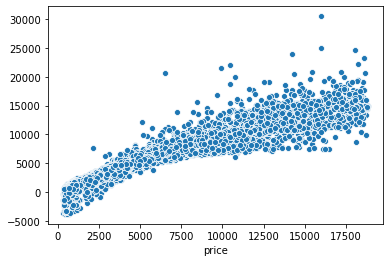

In [152]:
sb.scatterplot(y_test , y_pred)

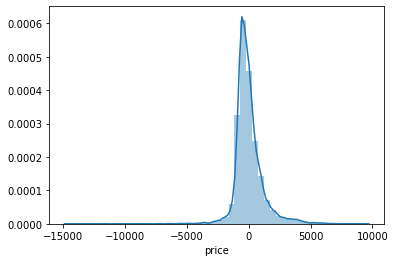

In [153]:
sb.distplot(y_test - y_pred)

In [154]:
import sklearn.metrics as mt
import numpy as np

In [155]:
mt.mean_absolute_error(y_test,y_pred)

748.4824341925314

In [156]:
(y_test - y_pred).abs().mean()

748.4824341925366

In [157]:
np.sqrt(mt.mean_squared_error(y_test,y_pred))

1143.280523229699

In [158]:
model.coef_

array([ 1.12986408e+04, -7.45433942e+01, -3.29944242e+01, -1.01433012e+03,
       -1.41550865e+00, -6.15167759e+01, -6.12311672e+02,  1.98374009e+01,
        2.45521361e+02,  1.90686296e+02,  1.56266614e+02,  8.17673488e+02,
        6.12353178e+02,  5.53908235e+02,  3.39122797e+02, -1.44451884e+02,
       -6.36876345e+02, -1.54172947e+03, -3.89722087e+03,  1.51355774e+03,
       -1.23846233e+02, -1.08439694e+03,  7.80324646e+02,  4.71385712e+02,
        1.21100133e+03,  1.12919461e+03])